# Knit Script Installation Test and Walkthorugh

Start by creating a knit_script program or ".ks" file. 

Knit script can be run from python strings such as:

In [1]:
program = r"""
import cast_ons;
import stockinette;

with Carrier as 1, width as 4, height as 4:{
    cast_ons.alt_tuck_cast_on(width);
    stockinette.stst(height);                
}
        """
with open("program.ks", mode='w') as file:
	file.write(program)

## Run KnitScript from String
This program can then be interpreted into knitout instructions by running the following

In [2]:
from knit_script.interpret import knit_script_to_knitout

knit_graph, _machine_state = knit_script_to_knitout(program, "installation.k", pattern_is_filename=False)


###################Start Knit Script Interpreter ###################

KS: Cast on 4loops from 1to 5


This will generate a "program.k" file which in this case reads:

In [3]:
def print_knitout(filename: str):
	with open( filename, mode='r') as knitout_file:
		print_str = ""
		for line in knitout_file.readlines():
			print_str += line
		print(print_str)

print_knitout("installation.k")

;!knitout-2
;;Carriers: 1 2 3 4 5 6 7 8 9 10
;;Machine: SWG091N2
;;Gauge: 15
;;Width: 250
;;Position: Center
inhook 1;Activating carrier 1
tuck - f3 1
tuck - f1 1
tuck + f0 1
tuck + f2 1
releasehook 1
knit - f3 1
knit - f2 1
knit - f1 1
knit - f0 1
knit + f0 1
knit + f1 1
knit + f2 1
knit + f3 1
knit - f3 1
knit - f2 1
knit - f1 1
knit - f0 1
knit + f0 1
knit + f1 1
knit + f2 1
knit + f3 1
knit - f3 1
knit - f2 1
knit - f1 1
knit - f0 1
knit + f0 1
knit + f1 1
knit + f2 1
knit + f3 1
knit - f3 1
knit - f2 1
knit - f1 1
knit - f0 1
knit + f0 1
knit + f1 1
knit + f2 1
knit + f3 1
outhook 1;Cutting all active yarns


It also creates a KnitGraph object which you can visualize:

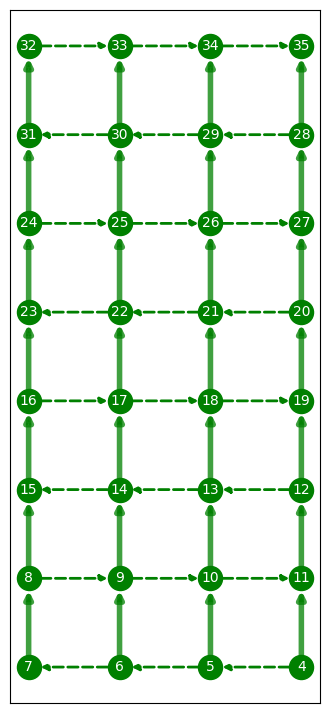

In [4]:
from knit_script.knit_graphs.knit_graph_viz import visualize_sheet

visualize_sheet(knit_graph, "program_knit_graph.png")


## Run KnitScript from file
You can also run knitout from separate files usually with a `.ks` extenstion, like so:

In [5]:
knit_graph, _machine_state = knit_script_to_knitout("installation_test.ks", "program_from_file.k", pattern_is_filename=True)

print_knitout("program_from_file.k")


###################Start Knit Script Interpreter on installation_test.ks###################

KS: Cast on 6loops from 1to 7
;!knitout-2
;;Carriers: 1 2 3 4 5 6 7 8 9 10
;;Machine: SWG091N2
;;Gauge: 15
;;Width: 250
;;Position: Center
inhook 1;Activating carrier 1
tuck - f5 1
tuck - f3 1
tuck - f1 1
tuck + f0 1
tuck + f2 1
tuck + f4 1
releasehook 1
knit - f5 1
knit - f4 1
knit - f3 1
knit - f2 1
knit - f1 1
knit - f0 1
knit + f0 1
knit + f1 1
knit + f2 1
knit + f3 1
knit + f4 1
knit + f5 1
knit - f5 1
knit - f4 1
knit - f3 1
knit - f2 1
knit - f1 1
knit - f0 1
knit + f0 1
knit + f1 1
knit + f2 1
knit + f3 1
knit + f4 1
knit + f5 1
knit - f5 1
knit - f4 1
knit - f3 1
knit - f2 1
knit - f1 1
knit - f0 1
knit + f0 1
knit + f1 1
knit + f2 1
knit + f3 1
knit + f4 1
knit + f5 1
knit - f5 1
knit - f4 1
knit - f3 1
knit - f2 1
knit - f1 1
knit - f0 1
knit + f0 1
knit + f1 1
knit + f2 1
knit + f3 1
knit + f4 1
knit + f5 1
outhook 1;Cutting all active yarns


# Getting Machine Files for Shima Seiki
If you want to run this knitout on a Shima Seiki machine, you will need to create a DAT file using the DAT compiler. This looks similar to the above calls:

In [6]:
from knit_script.interpret import knit_script_to_knitout_to_dat

knit_graph, _machine_state = knit_script_to_knitout_to_dat("program.ks", "program_for_dat.k","program.dat", pattern_is_filename=True)


###################Start Knit Script Interpreter on program.ks###################

KS: Cast on 4loops from 1to 5

################Converting program_for_dat.k to DAT file program.dat ########


To view this DAT file you can load it into the HTMl interface from [Dat Viewer](../knit_script/knitout_compilers/dat-viewer.html).